<a href="https://colab.research.google.com/github/SeeBook2022/SeeBook-OCR/blob/main/04.web/test/select_bbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
stage1_bbox_list = [[917.396484, 299.811584, 1188.054199, 2786.784180],
	[2249.994385, 278.371521, 2494.057373,	2821.194092],
    [587.161621, 287.250031, 886.554626,	2793.372070],
    [1445.635498, 0.000000 ,1679.305664,	2884.898193],
    [1963.661499, 153.834259	,2238.204102,	2842.036621],
    [31.729342,	130.973969,	285.928162,	2811.021973],
    [2756.038086, 56.115524	,3001.585449,	2835.105713],
    [3529.113037, 79.285637	,3821.340820,	2852.772705],
    [1735.231201 ,273.729187	,1945.319092,	2814.708740],	
    [339.365570, 291.282715,	569.484436,	2796.272949],
	[1196.561157, 195.597809	,1437.344971,	2842.939941],
	[3007.738525, 226.086029	,3231.364258,	2822.125732],
	[2510.158447, 95.123978	,2748.849365,	2816.204102],
	[3244.579102, 189.151398	,3488.884033,	2848.335449]]

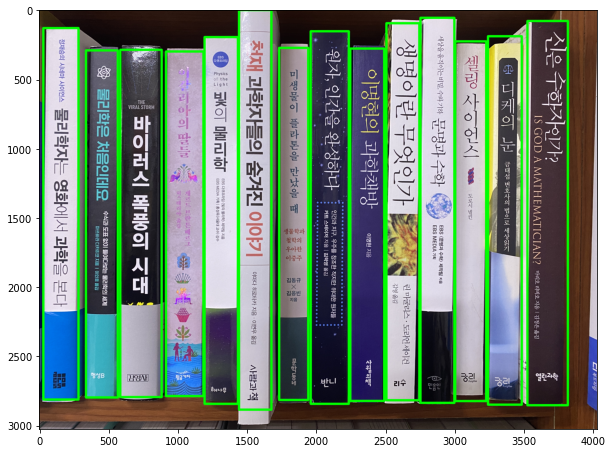

In [ ]:
img_file_path = '/content/drive/MyDrive/aiffel_hackathon3/select_bbox/test6.jpg'
img = cv2.imread(img_file_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
green = (0, 255, 0)

for bbox in stage1_bbox_list:
    img_show = cv2.rectangle(img_rgb, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), color = green, thickness = 15) # label_bbox 표시 
plt.figure(figsize=(10,10))
plt.imshow(img_show)
plt.show()

## 중심좌표 비교 (실패)

In [ ]:
# # 중심 좌표 버전
# def test(stage1_bbox_list, click_list):
#     def to_center_point(point_list):
#         x1, y1, x2, y2 = point_list[0], point_list[1], point_list[2],point_list[3]
#         return (x1+x2)/2, (y1+y2)/2

#     def select_box(stage1_bbox_list, point):
#         from scipy.spatial import distance
#         d = float('inf')
#         for a in stage1_bbox_list:
#             centered_a = to_center_point(a)
#             if distance.euclidean(centered_a, point) < d: 
#                 d = distance.euclidean(centered_a, point)
#                 mp = a 
#                 print('a:', a)
#                 print('click_p:',point)
#                 print('center_p:',centered_a)
#                 print('d:', d)
#                 print('=='*10)
#         return stage1_bbox_list.index(mp)

#     return [stage1_bbox_list[select_box(stage1_bbox_list, p)] for p in click_list]

In [ ]:
# click_list = [(587.161621, 287.250031)] # 3 번 사진 선택 마우스 좌표

In [ ]:
# test(stage1_bbox_list, click_list)

a: [917.396484, 299.811584, 1188.054199, 2786.78418]
click_p: (587.161621, 287.250031)
center_p: (1052.7253415, 1543.297882)
d: 1339.5543220965399
a: [587.161621, 287.250031, 886.554626, 2793.37207]
click_p: (587.161621, 287.250031)
center_p: (736.8581234999999, 1540.3110505)
d: 1261.9710620498045
a: [31.729342, 130.973969, 285.928162, 2811.021973]
click_p: (587.161621, 287.250031)
center_p: (158.82875199999998, 1470.997971)
d: 1258.8598937610232


[[31.729342, 130.973969, 285.928162, 2811.021973]]

## 좌표, bbox 영역 비교 (성공)


In [ ]:
def test2(stage1_bbox_list, click_list):
    def compare_point(point_list, click_point):
        x1, y1, x2, y2 = point_list[0], point_list[1], point_list[2],point_list[3]
        if (x1 < click_point[0] < x2) and (y1 < click_point[1] < y2):
            return point_list

    result = []
    for bbox in stage1_bbox_list:
        for p in click_list:
            cr = compare_point(bbox, p)
            if cr != None: result.append(cr) 
    return result

In [ ]:
click_list = [(920, 300), (2250, 280), (590, 290), (2230, 284), (569, 2796)] # 1, 2, 3, 5, 10 번 사진 선택 마우스 좌표

In [ ]:
test2(stage1_bbox_list, click_list)

[[917.396484, 299.811584, 1188.054199, 2786.78418],
 [2249.994385, 278.371521, 2494.057373, 2821.194092],
 [587.161621, 287.250031, 886.554626, 2793.37207],
 [1963.661499, 153.834259, 2238.204102, 2842.036621],
 [339.36557, 291.282715, 569.484436, 2796.272949]]

## 음영 테스트

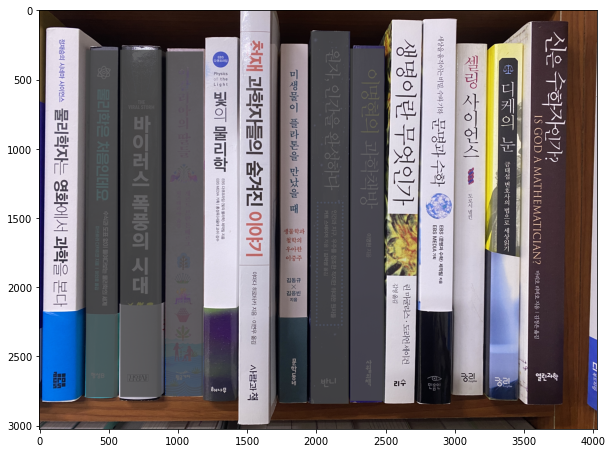

In [ ]:
for bbox in test2(stage1_bbox_list, click_list):
    x1, y1, x2, y2 = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
    sub_img = img_rgb[y1:y2, x1:x2]
    white_rect = np.ones(sub_img.shape, dtype=np.uint8) * 255 # 흰색
    res = cv2.addWeighted(sub_img, 0.4, white_rect, 0.6, 1.0)

    img_rgb[y1:y2, x1:x2] = res
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.show()

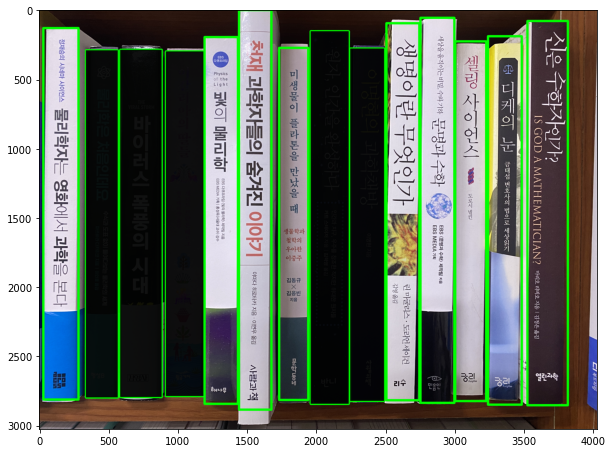

In [ ]:
for bbox in test2(stage1_bbox_list, click_list):
    x1, y1, x2, y2 = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
    sub_img = img_rgb[y1:y2, x1:x2]
    white_rect = np.zeros(sub_img.shape, dtype=np.uint8) * 255 # 검정색
    white_rect[:,:,1] = 1
    res = cv2.addWeighted(sub_img, 0.4, white_rect, 0.6, 1.0)

    img_rgb[y1:y2, x1:x2] = res
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.show()


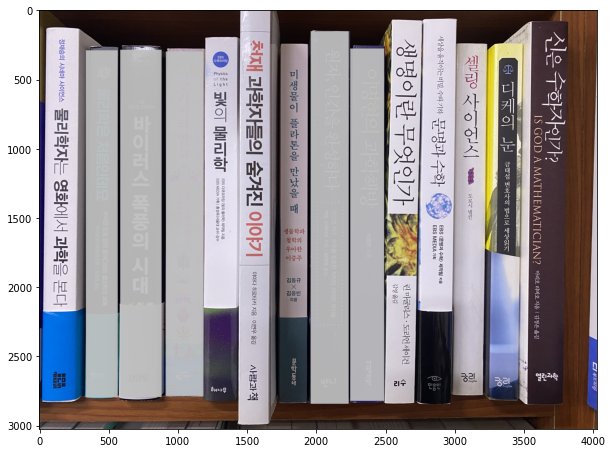

In [ ]:
for bbox in test2(stage1_bbox_list, click_list):
    x1, y1, x2, y2 = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
    sub_img = img_rgb[y1:y2, x1:x2]
    white_rect = np.ones(sub_img.shape, dtype=np.uint8) * 255 # 흰색
    # white_rect = np.zeros(sub_img.shape, dtype=np.uint8) * 255 # 검정색
    res = cv2.addWeighted(sub_img, 0.4, white_rect, 0.6, 1.0)

    img_rgb[y1:y2, x1:x2] = res
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.show()

## 음영 합치기 (흰+검)

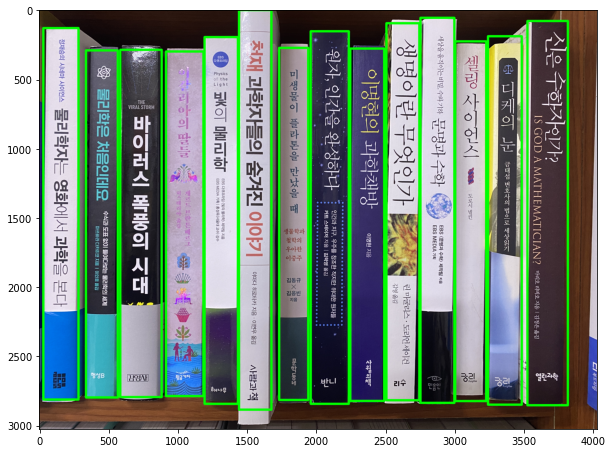

In [ ]:
img_file_path = '/content/drive/MyDrive/aiffel_hackathon3/select_bbox/test6.jpg'
img = cv2.imread(img_file_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
green = (0, 255, 0)

for bbox in stage1_bbox_list:
    img_show = cv2.rectangle(img_rgb, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), color = green, thickness = 15) # label_bbox 표시 
plt.figure(figsize=(10,10))
plt.imshow(img_show)
plt.show()

In [ ]:
def select_book(stage1_bbox_list, click_list): 
    results = test2(stage1_bbox_list, click_list)
    for bbox in stage1_bbox_list:
        x1, y1, x2, y2 = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
        sub_img = img_rgb[y1:y2, x1:x2]
        
        if bbox in results:
            white_rect = np.ones(sub_img.shape, dtype=np.uint8) * 255 # 흰색
            res = cv2.addWeighted(sub_img, 0.4, white_rect, 0.6, 1.0)
            img_rgb[y1:y2, x1:x2] = res

        elif bbox not in results:
            black_rect = np.zeros(sub_img.shape, dtype=np.uint8) * 255 # 검정색
            res = cv2.addWeighted(sub_img, 0.3, black_rect, 0.7, 1.0)
            img_rgb[y1:y2, x1:x2] = res
    
    plt.figure(figsize=(10,10))
    plt.imshow(img_rgb)
    plt.show()

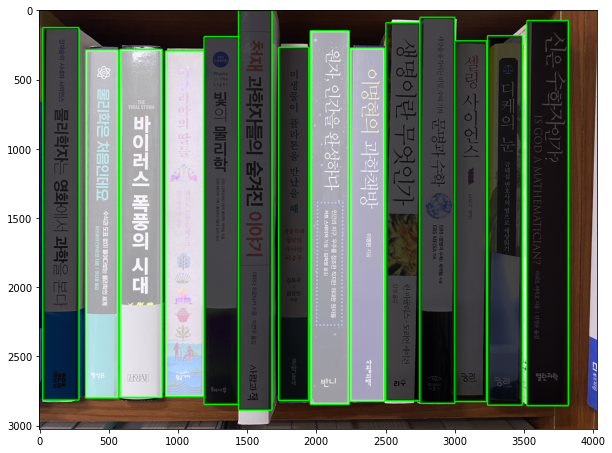

In [ ]:
select_book(stage1_bbox_list, click_list)